The code below imports the necessary libraries for this project.

In [1]:
!pip install pandas numpy matplotlib seaborn wordcloud scikit-learn nltk

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

import nltk
from nltk import word_tokenize, pos_tag
from nltk.util import ngrams
from collections import Counter
import re
import string

The code below loads a dataset and applies the cleaning function to create a new cleaned tweets column.

In [2]:
# Load the training data into a dataframe
df = pd.read_csv("train_E6oV3lV.csv")

# Function for cleaning the tweet
def cleanTweet(tweet):
    tweet = tweet.lower()
    tweet = tweet.replace("@user", "")
    tweet = tweet.replace("#", "")
    tweet = re.sub(r"http\S+", "", tweet)
    tweet = re.sub(r"[^a-z0-9\s]", "", tweet)
    tweet = re.sub(r"\s+", " ", tweet).strip()
    return tweet

# Create a new column for the cleaned tweet
df["cleanTweet"] = df["tweet"].apply(cleanTweet)

The code below calculates and visualizes the frequency of each part of speech (POS) in the training dataset.

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/yparmar/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/yparmar/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


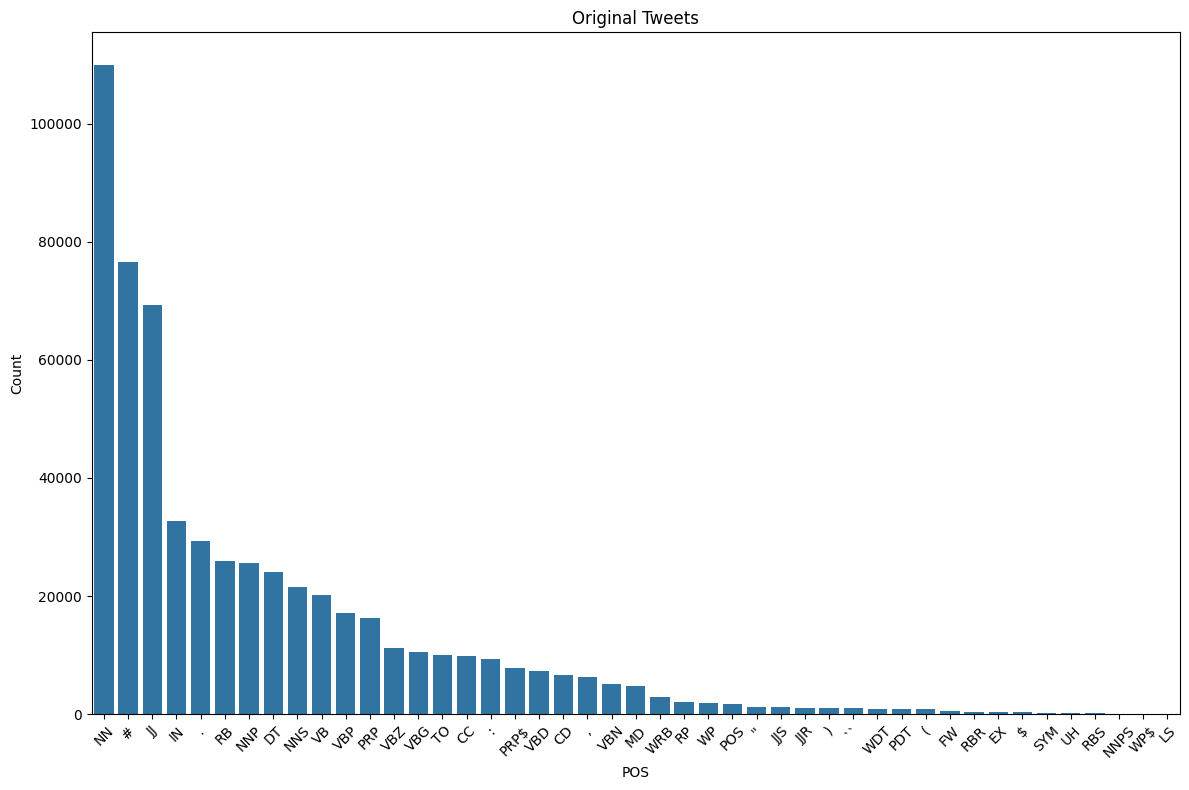

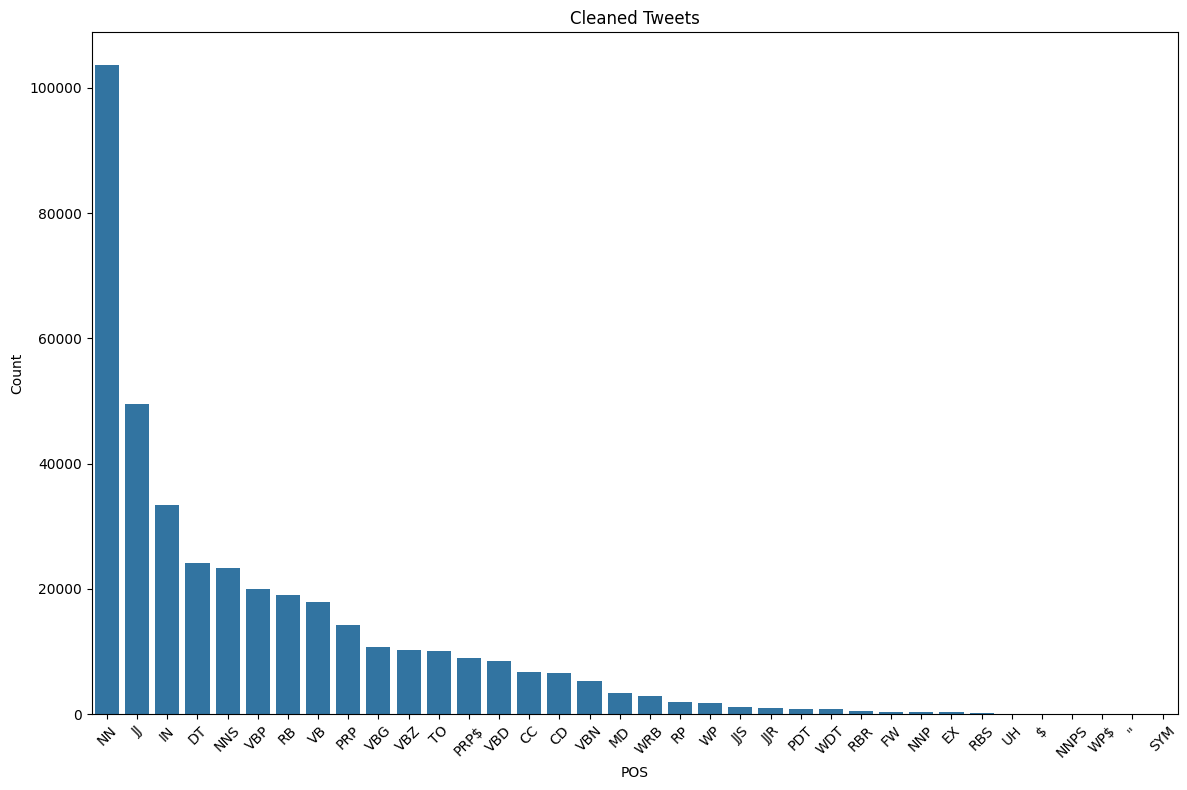

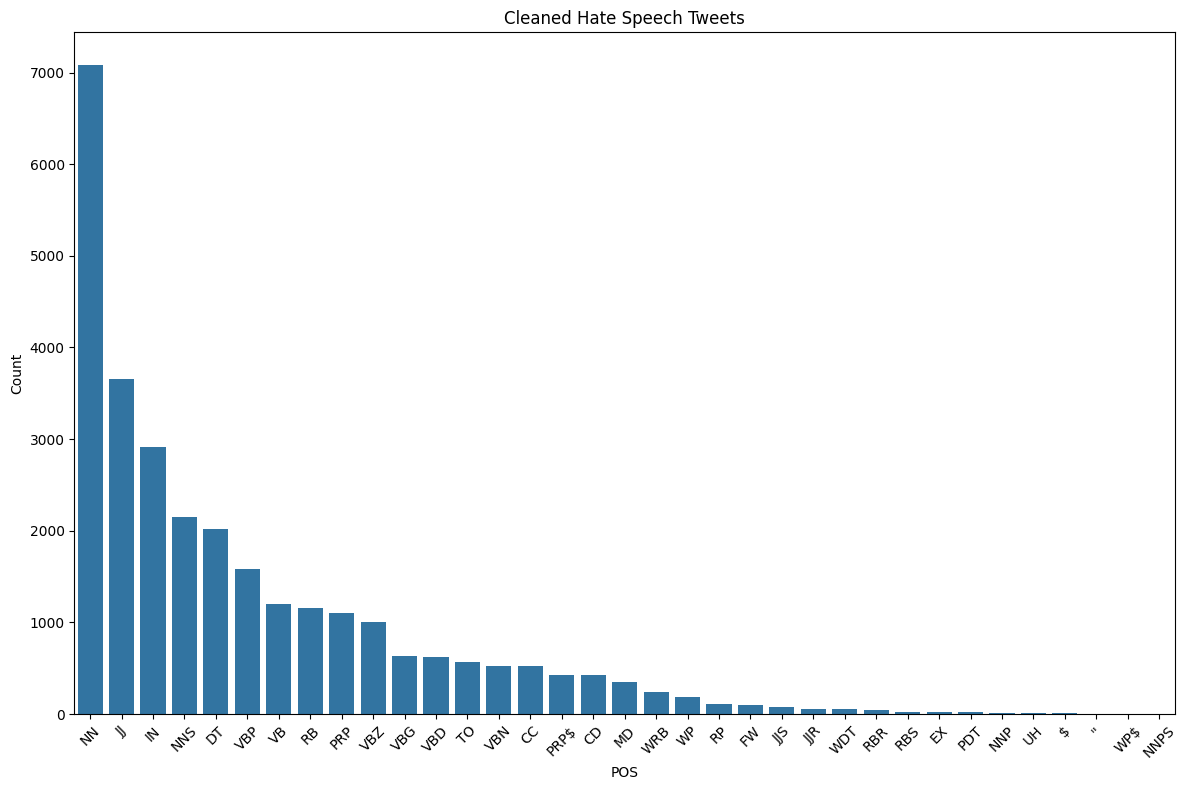

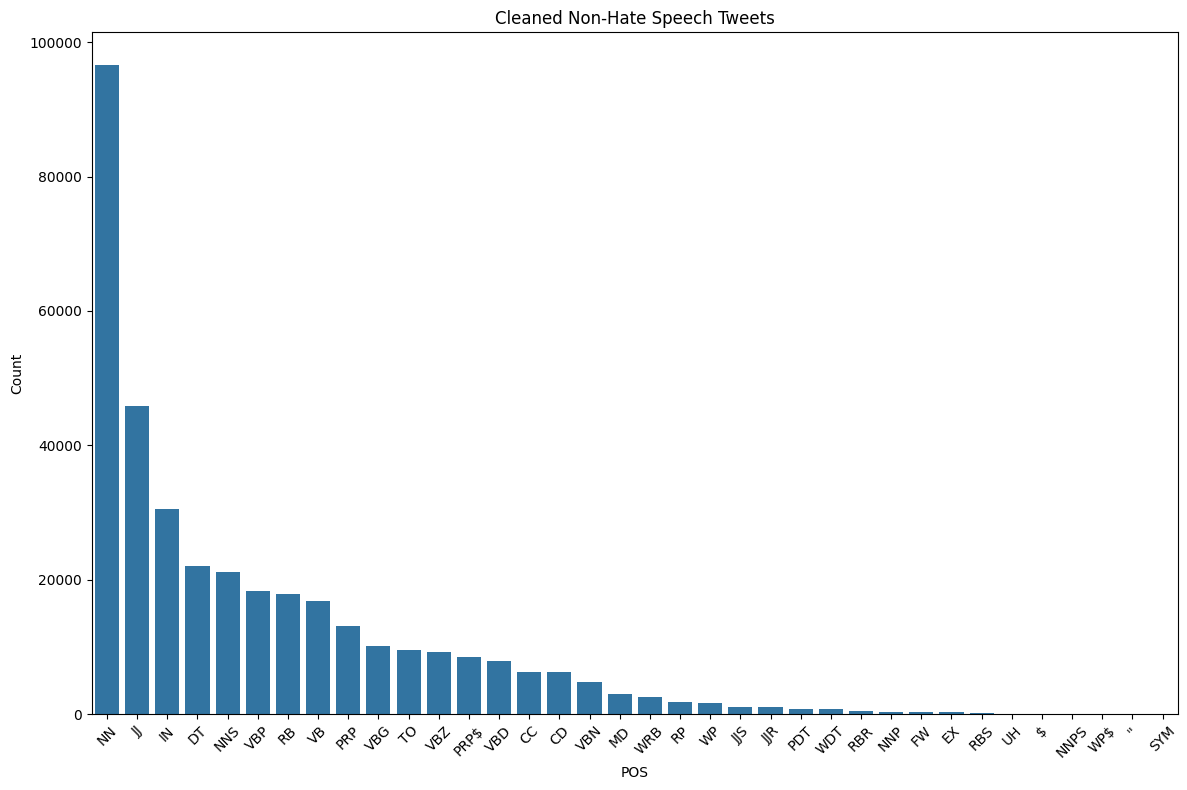

In [3]:
# Download necessary NLTK data files for tokenization and POS tagging
nltk.download("punkt_tab")
nltk.download("averaged_perceptron_tagger_eng")

def plotPOSTagFrequencies(textList, title):
    combinedText = " ".join(textList)

    tokens = nltk.word_tokenize(combinedText)
    posTags = nltk.pos_tag(tokens)

    posCounts = Counter(tag for word, tag in posTags)
    posDf = pd.DataFrame(posCounts.items(), columns = ["POS", "Count"]).sort_values(by = "Count", ascending = False)

    plt.figure(figsize = (12, 8))
    sns.barplot(x = "POS", y = "Count", data = posDf)
    plt.title(title)
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.show()

plotPOSTagFrequencies(df["tweet"], "Original Tweets")
plotPOSTagFrequencies(df["cleanTweet"], "Cleaned Tweets")
plotPOSTagFrequencies(df[df["label"] == 1]["cleanTweet"], "Cleaned Hate Speech Tweets")
plotPOSTagFrequencies(df[df["label"] == 0]["cleanTweet"], "Cleaned Non-Hate Speech Tweets")

The code below calculates the average word count before and after cleaning the tweets.

In [4]:
# Function to calculate average word count in dataframe column
def averageWordCount(tweets):
    wordCounts = tweets.apply(lambda tweet: len(str(tweet).split()))
    return wordCounts.mean()

# Print average word count before cleaning, after cleaning and difference
print(f"Average Word Count before Cleaning: {averageWordCount(df['tweet']):.2f}")
print(f"Average Word Count after Cleaning: {averageWordCount(df['cleanTweet']):.2f}")
print(f"Average Word Count Difference before and after Cleaning: {averageWordCount(df['tweet']) - averageWordCount(df['cleanTweet']):.2f}")

Average Word Count before Cleaning: 13.16
Average Word Count after Cleaning: 12.11
Average Word Count Difference before and after Cleaning: 1.04


The code below visualizes the most frequent single word, paired words, and three paired words before and after cleaning the tweets.

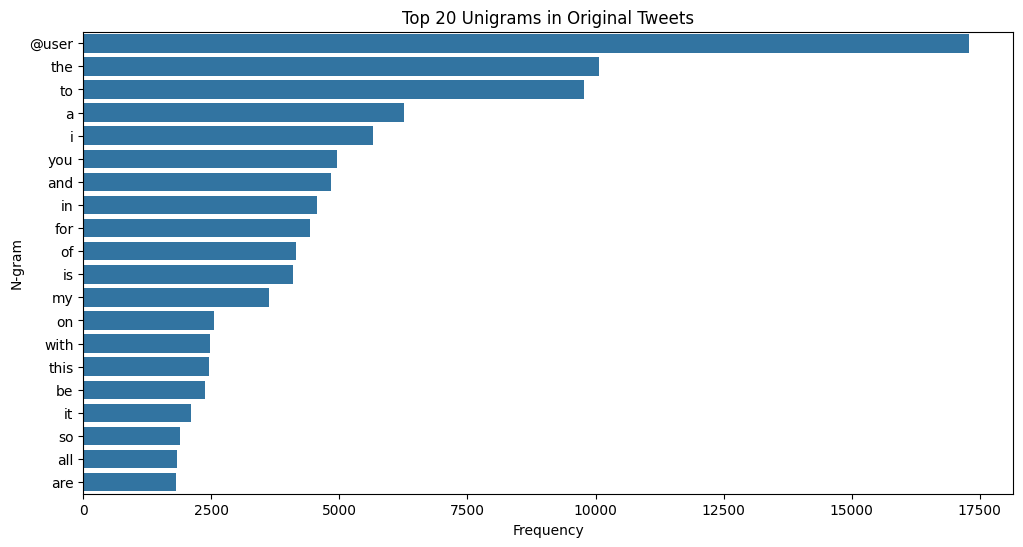

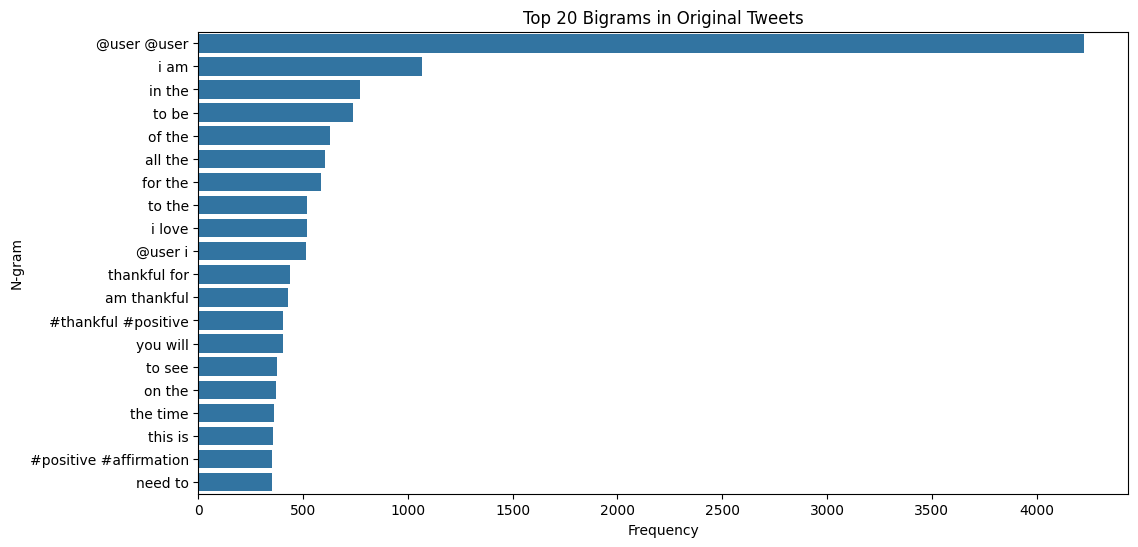

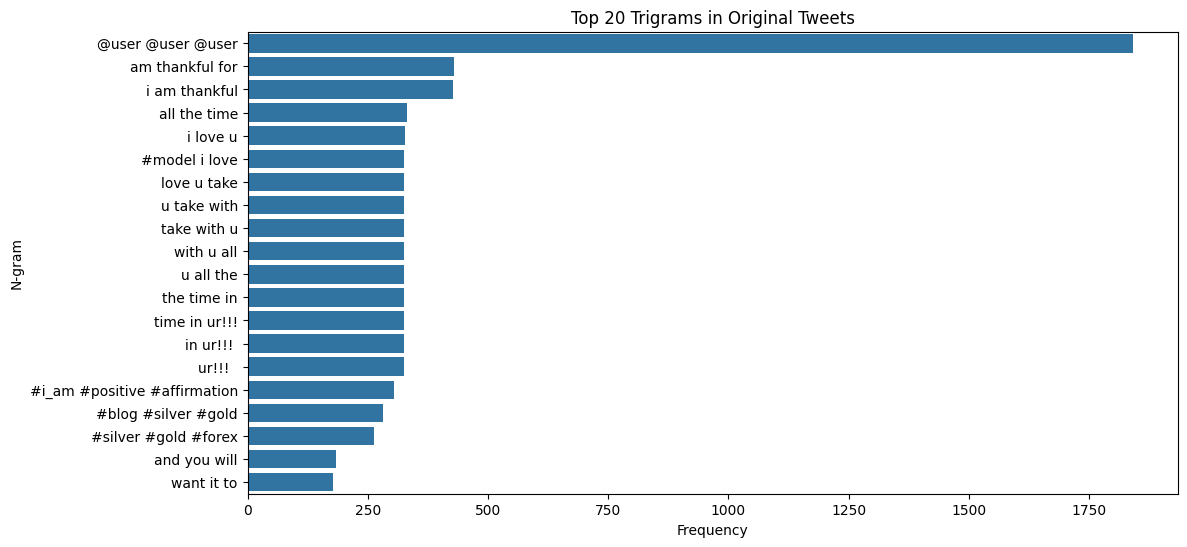

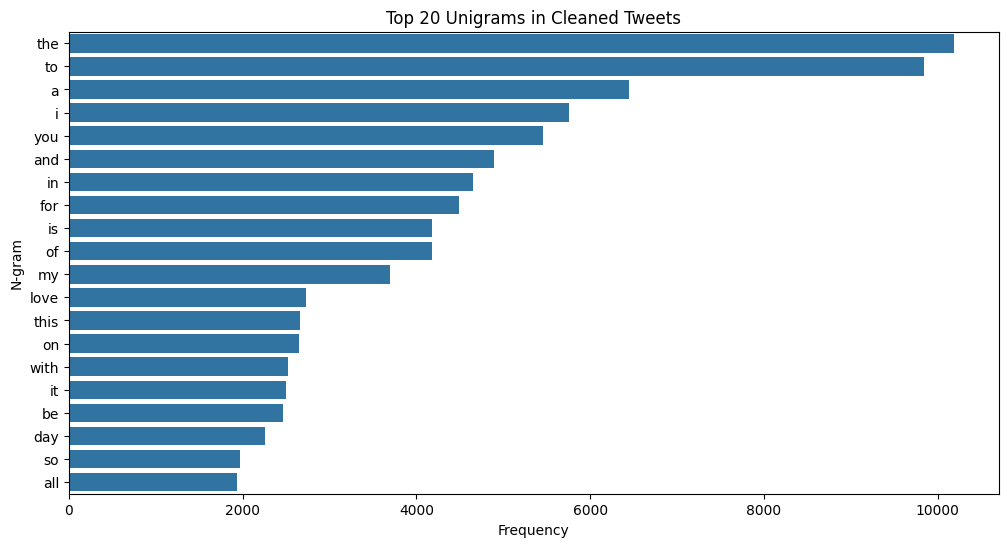

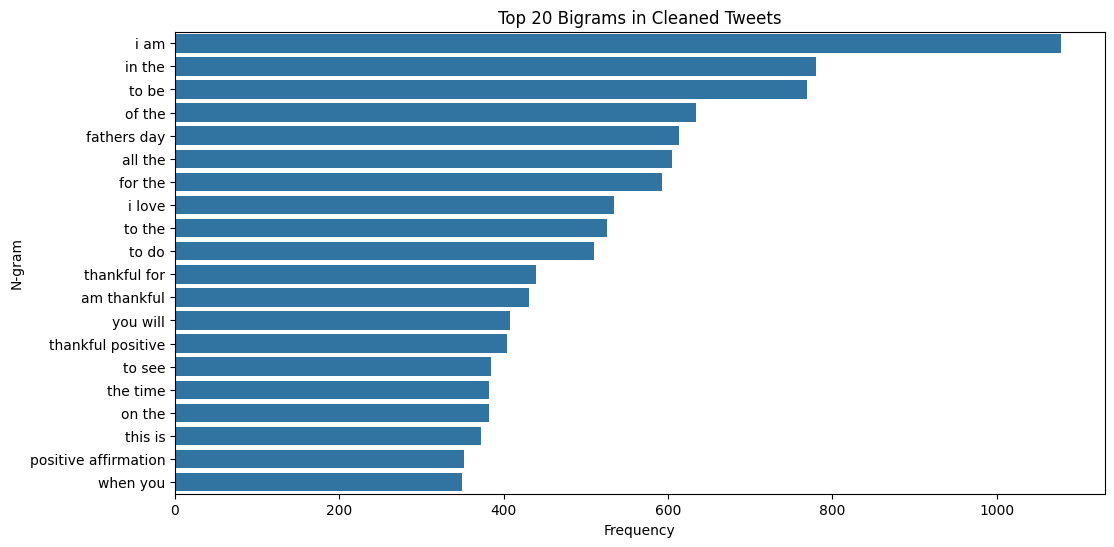

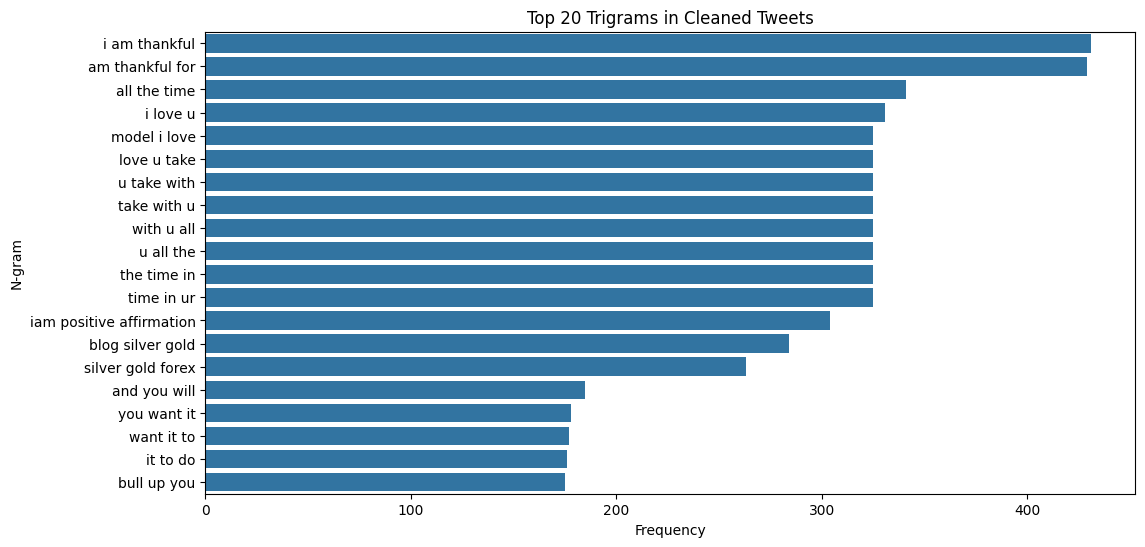

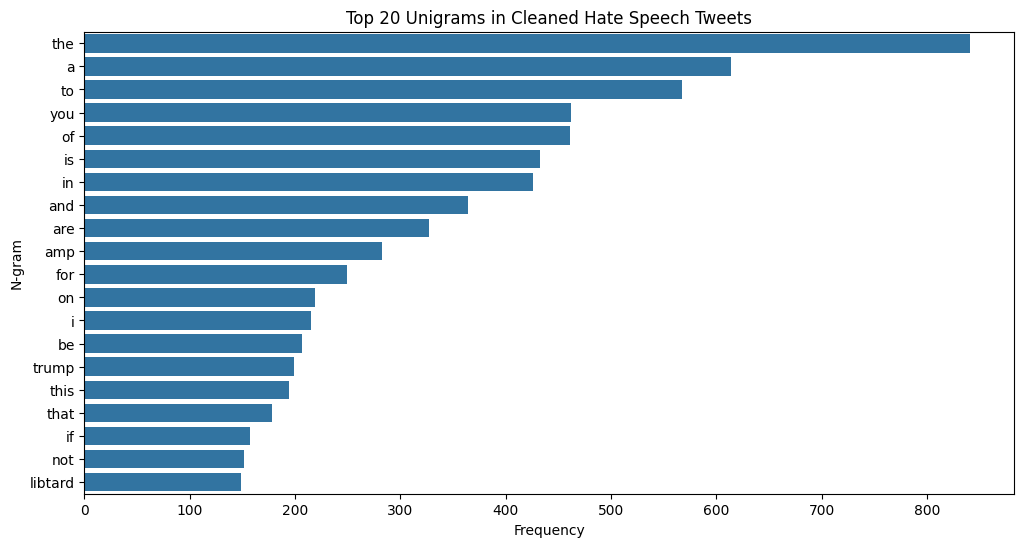

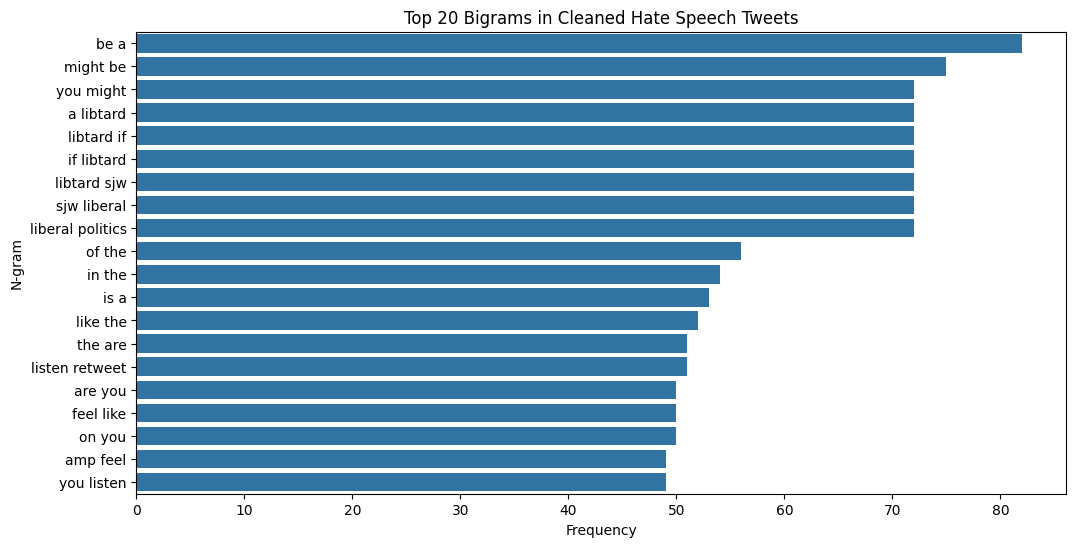

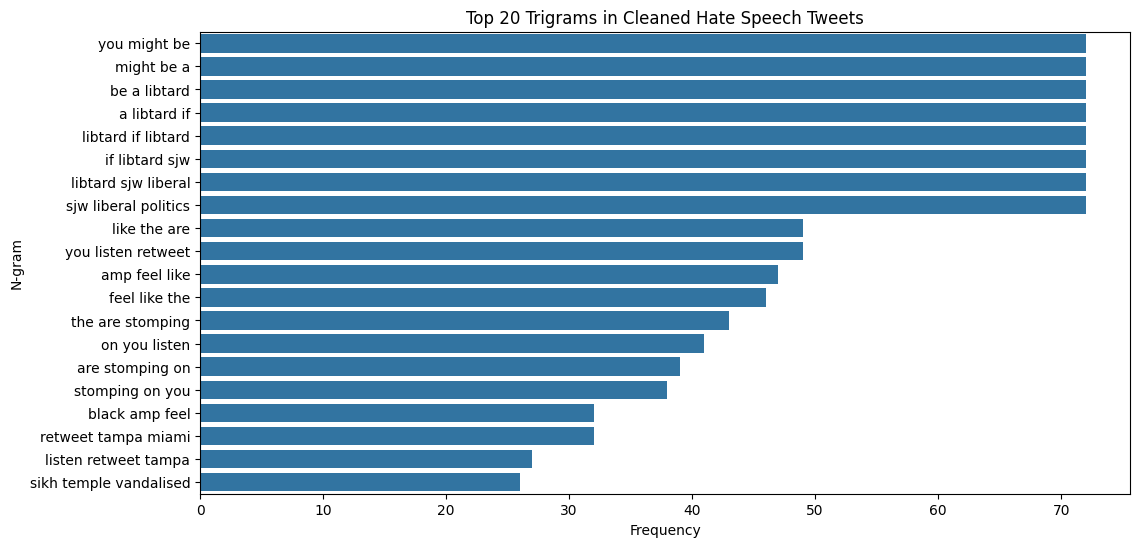

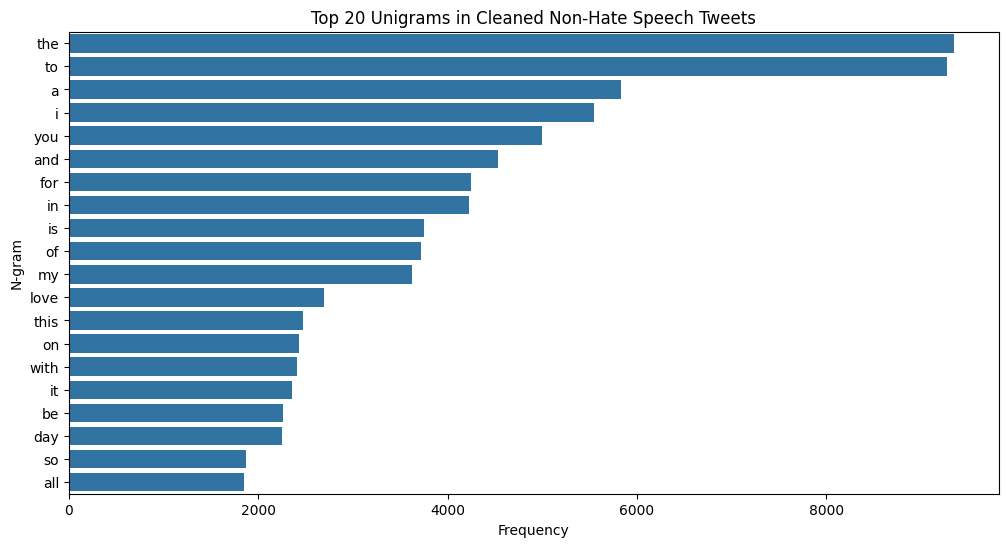

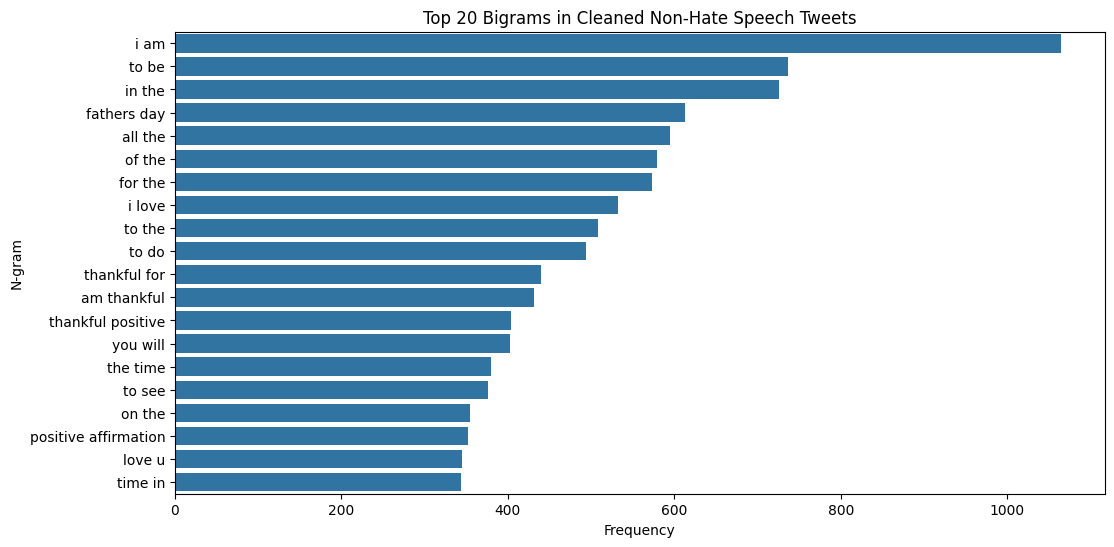

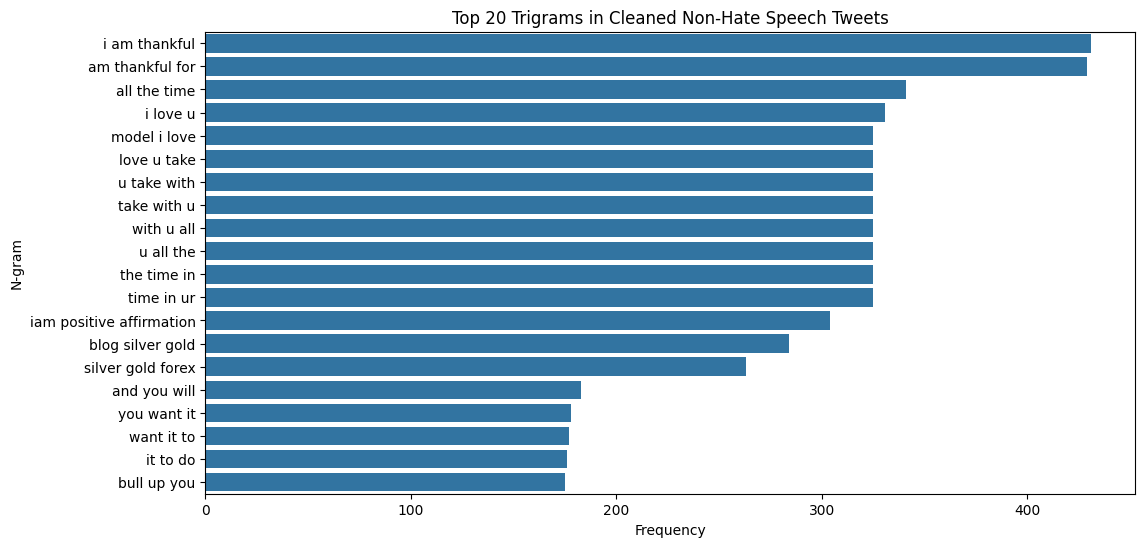

In [5]:
# Function to remove non-ASCII characters
def removeUnsupportedChars(text):
    return text.encode("ascii", errors = "ignore").decode()

# Function to get the top N grams in a corpus
def getTopNgrams(corpus, n = 1, topK = 20):
    tokens = [word for sentence in corpus for word in sentence.split()]
    ngramList = list(ngrams(tokens, n))

    return Counter(ngramList).most_common(topK)

# Function to plot the top N grams
def plotTopNgrams(ngramCounts, title):
    ngrams_ = []
    counts = []
    
    for ngram, count in ngramCounts:
        ngrams_.append(ngram)
        counts.append(count)

    ngramsStr = [removeUnsupportedChars(" ".join(ngram)) for ngram in ngrams_]

    plt.figure(figsize = (12, 6))
    sns.barplot(x = counts, y = ngramsStr)
    plt.title(title)
    plt.xlabel("Frequency")
    plt.ylabel("N-gram")
    plt.show()

# Function to plot the top N grams for a corpus
def plotNgramsForCorpus(corpus, label, topK = 20):
    for n in [1, 2, 3]:
        ngramsCounts = getTopNgrams(corpus, n = n, topK = topK)
        plotTopNgrams(ngramsCounts, f"Top {topK} {["Unigrams", "Bigrams", "Trigrams"][n - 1]} in {label}")

# Get the corpus' to put into function
originalCorpus = df["tweet"].tolist()
cleanedCorpus = df["cleanTweet"].tolist()

hateTweets = df[df["label"] == 1]["cleanTweet"].tolist()
nonHateTweets = df[df["label"] == 0]["cleanTweet"].tolist()

# Plot the top N grams for the corpus
plotNgramsForCorpus(originalCorpus, "Original Tweets")
plotNgramsForCorpus(cleanedCorpus, "Cleaned Tweets")
plotNgramsForCorpus(hateTweets, "Cleaned Hate Speech Tweets")
plotNgramsForCorpus(nonHateTweets, "Cleaned Non-Hate Speech Tweets")

The code below plots the word clouds for the original, cleaned, cleaned hate, and cleaned non-hate tweets.

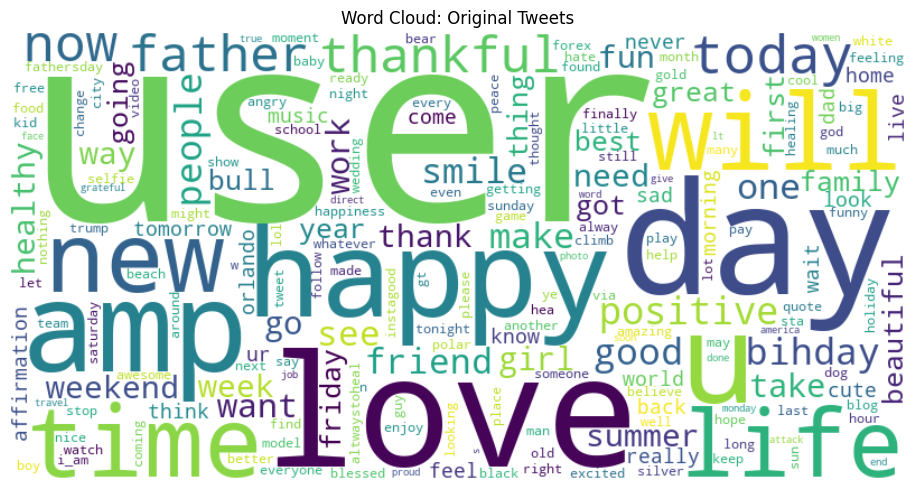

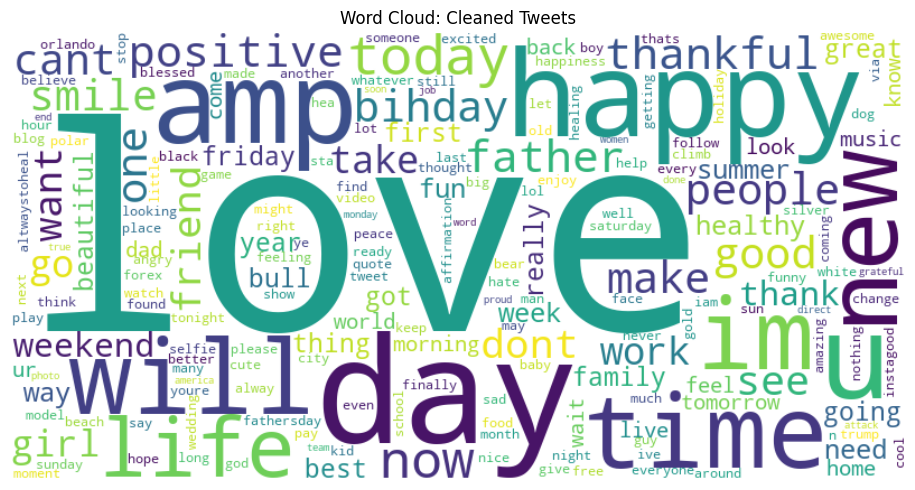

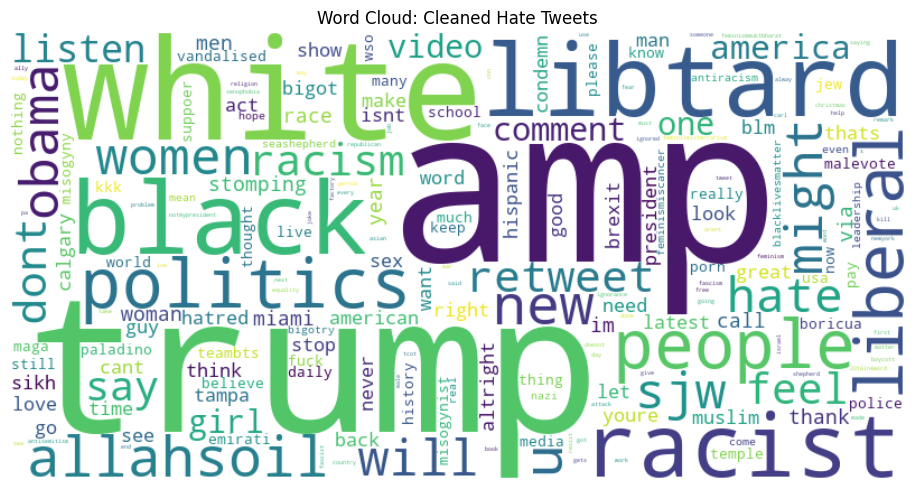

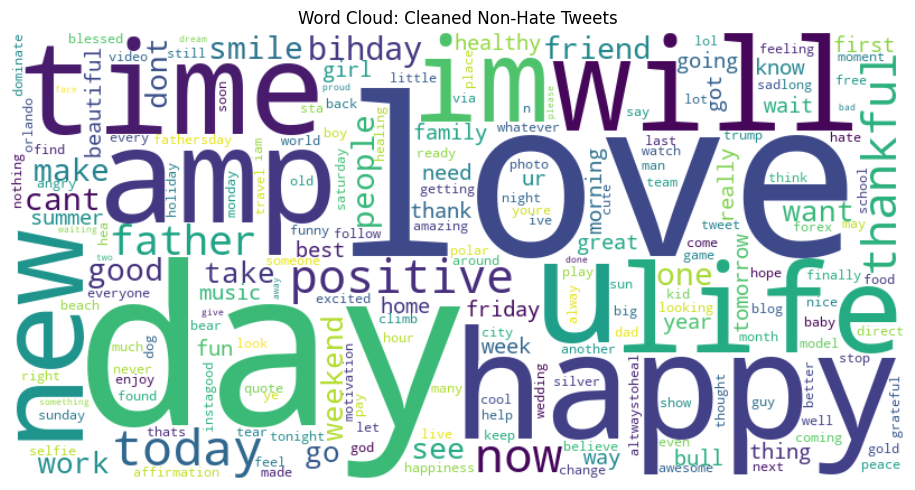

In [6]:
# Function to generate and plot a word cloud
def plotWordCloud(corpus, title):
    text = " ".join(corpus)
    
    text = removeUnsupportedChars(text)
    
    wordCloud = WordCloud(
        width = 800,
        height = 400,
        background_color = "white",
        max_words = 200,
        collocations = False
    ).generate(text)
    
    plt.figure(figsize = (10, 5))
    plt.imshow(wordCloud, interpolation = "bilinear")
    plt.title(title)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

# Plot the word clouds for each corpus
plotWordCloud(originalCorpus, "Word Cloud: Original Tweets")
plotWordCloud(cleanedCorpus, "Word Cloud: Cleaned Tweets")
plotWordCloud(hateTweets, "Word Cloud: Cleaned Hate Tweets")
plotWordCloud(nonHateTweets, "Word Cloud: Cleaned Non-Hate Tweets")